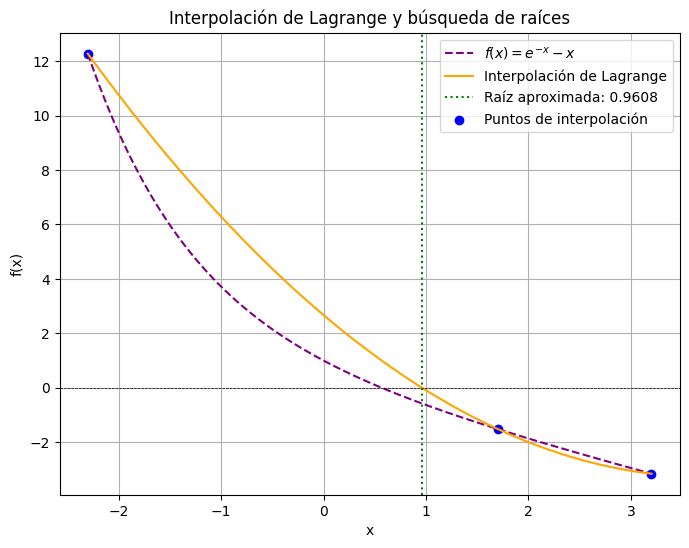

La raíz aproximada usando interpolación es: 0.9608
Errores en cada iteración del método de bisección:
Iteración	Error Absoluto	Error Relativo	Error Cuadrático
1	2.750000e+00	6.111111e+00	7.562500e+00
2	1.375000e+00	7.534247e-01	1.890625e+00
3	6.875000e-01	6.043956e-01	4.726562e-01
4	3.437500e-01	4.330709e-01	1.181641e-01
5	1.718750e-01	1.779935e-01	2.954102e-02
6	8.593750e-02	9.769094e-02	7.385254e-03
7	4.296875e-02	4.657070e-02	1.846313e-03
8	2.148438e-02	2.275548e-02	4.615784e-04
9	1.074219e-02	1.124974e-02	1.153946e-04
10	5.371094e-03	5.593410e-03	2.884865e-05
11	2.685547e-03	2.788905e-03	7.212162e-06
12	1.342773e-03	1.396400e-03	1.803041e-06
13	6.713867e-04	6.986877e-04	4.507601e-07
14	3.356934e-04	3.494660e-04	1.126900e-07
15	1.678467e-04	1.747024e-04	2.817251e-08
16	8.392334e-05	8.734360e-05	7.043127e-09
17	4.196167e-05	4.367371e-05	1.760782e-09
18	2.098083e-05	2.183638e-05	4.401954e-10
19	1.049042e-05	1.091831e-05	1.100489e-10
20	5.245209e-06	5.459124e-06	2.751221e-11
21	2.62260

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función que define la ecuación original
def f(x):
    return np.exp(-x) - x

# Interpolación de Lagrange para aproximar la función
def lagrange_interpolation(x, x_points, y_points):
    n = len(x_points)
    result = 0
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

# Método de Bisección con cálculo de errores durante el proceso
def bisect(func, a, b, tol=1e-6, max_iter=100):
    if func(a) * func(b) > 0:
        raise ValueError("El intervalo no contiene una raíz")

    errores_abs = []
    errores_rel = []
    errores_cuad = []

    c_old = a  # Para calcular errores en la primera iteración
    for _ in range(max_iter):
        c = (a + b) / 2
        error_abs = abs(c - c_old)
        error_rel = error_abs / abs(c) if c != 0 else 0
        error_cuad = error_abs ** 2

        errores_abs.append(error_abs)
        errores_rel.append(error_rel)
        errores_cuad.append(error_cuad)

        if abs(func(c)) < tol or (b - a) / 2 < tol:
            return c, errores_abs, errores_rel, errores_cuad

        if func(a) * func(c) < 0:
            b = c
        else:
            a = c

        c_old = c

    return (a + b) / 2, errores_abs, errores_rel, errores_cuad

# Puntos seleccionados para la interpolación dentro del intervalo [-2.3, 3.2]
x0 = -2.3
x1 = 1.7
x2 = 3.2
x_points = np.array([x0, x1, x2])
y_points = f(x_points)

# Generación del polinomio interpolante
x_vals = np.linspace(x0, x2, 100)
y_interp = [lagrange_interpolation(x, x_points, y_points) for x in x_vals]

# Encontrar la raíz usando el método de bisección sobre el polinomio interpolante
root, errores_abs, errores_rel, errores_cuad = bisect(lambda x: lagrange_interpolation(x, x_points, y_points), x0, x2)

# Gráfica con colores actualizados
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f(x_vals), label="$f(x) = e^{-x} - x$", linestyle='dashed', color='purple')  # Color cambiado a púrpura
plt.plot(x_vals, y_interp, label="Interpolación de Lagrange", color='orange')  # Color cambiado a naranja
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(root, color='green', linestyle='dotted', label=f"Raíz aproximada: {root:.4f}")
plt.scatter(x_points, y_points, color='blue', label="Puntos de interpolación")  # Color cambiado a azul
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Interpolación de Lagrange y búsqueda de raíces")
plt.legend()
plt.grid(True)
plt.savefig("interpolacion_raices_colores.png")  # Guardar con nuevo nombre
plt.show()

# Imprimir la raíz encontrada
print(f"La raíz aproximada usando interpolación es: {root:.4f}")

# Mostrar los errores calculados
print("Errores en cada iteración del método de bisección:")
print("Iteración\tError Absoluto\tError Relativo\tError Cuadrático")
for i, (ea, er, ec) in enumerate(zip(errores_abs, errores_rel, errores_cuad)):
    print(f"{i+1}\t{ea:.6e}\t{er:.6e}\t{ec:.6e}")
